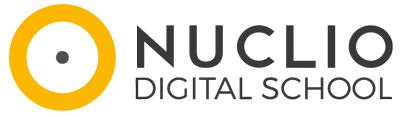

## **Proyecto Health Analytics para el estudio de la salud pública**

**DESCRIPCIÓN DEL PROYECTO**


Análisis en países desarrollados y subdesarrollados de la relación entre la esperanza de vida, las principales causas de muerte, el gasto en salud, el PIB per cápita, tasas de vacunación, niveles de pobreza, y las tasas de homicidios y suicidios en diferentes países. Este proyecto busca entender cómo los factores socioeconómicos y de salud pública influyen en la calidad y expectativa de vida a nivel global. Además, los resultados del análisis se complementarán con la implementación de un modelo simple que ayude a entender los factores de vida que impactan en la esperanza de vida de un país,  y diseñar un dashboard para la WHO con los principales resultados del análisis.


### Importacion de Librerias

In [8]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np
import os

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Manejo de advertencias
import warnings
warnings.filterwarnings('ignore')

# funciones
import importlib
import functions as fns
importlib.reload(fns)

# Filtro de paises
import pycountry
import country_converter as coco

# Configuraciones de pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Paths de datasets

In [9]:
# Rutas de los archivos de datos
data_folder = 'data_who/'

# Rutas de los archivos de csv
annual_number_of_deaths_by_cause_path = data_folder + 'annual_number_of_deaths_by_cause.csv'
death_rate_from_suicides_gho_path = data_folder + 'death_rate_from_suicides_gho.csv'
gdp_per_capita_penn_world_table_path = data_folder + 'gdp_per_capita_penn_world_table.csv'
global_vaccination_coverage_path = data_folder + 'global_vaccination_coverage.csv'
homicide_rate_unodc_path = data_folder + 'homicide_rate_unodc.csv'
life_expectancy_path = data_folder + 'life_expectancy.csv'
poverty_explorer_path = data_folder + 'poverty_explorer.csv'
public_healthcare_spending_share_gdp_path = data_folder + 'public_healthcare_spending_share_gdp.csv'


## 1. Analisis de Datos

### 1.1. Revision Inicial del conjunto de datos

#### Lectura de datasets y shape

In [10]:
# 1. Define la ruta donde están los ficheros
path = r'C:\Users\titoa\OneDrive\Documents\Nuclio\Proyecto Final\data_who'

# 2. Lista todos los archivos del directorio
lista = os.listdir(path)

# Crear lista con los archivos .csv o .xlsx
csv_files = [file for file in lista if file.endswith(('.csv', '.xlsx'))]

dict_data = {}

for file in csv_files:
    ruta = os.path.join(path, file)
    df = fns.leer_archivo(ruta)
    dict_data[file] = df
    print(f"{file}: {df.shape}")  # ejemplo: mostrar nombre y dimensiones

annual_number_of_deaths_by_cause.csv: (6840, 34)
death_rate_from_suicides_gho.csv: (3880, 4)
gdp_per_capita_penn_world_table.csv: (10108, 4)
global_vaccination_coverage.csv: (7897, 14)
homicide_rate_unodc.csv: (4204, 4)
life_expectancy.csv: (20755, 4)
poverty_explorer.csv: (2602, 109)
public_healthcare_spending_share_gdp.csv: (4014, 4)


In [ ]:
for key, value in dict_data.items():
    print(key)
    fns.exploracion_inicial(value, 'simple')

#### 1.2. Evaluar la posibilidad de complementar los datos disponibles con datos publicos de distintas fuentes relativos a otros factores de interes

Ya que mi variable principal es la esperanza de vida, debo asociar que combinacion de factores ayudan a que un pais tenga una mayor esperanza de vida.

Por conocimiento general uno podria decir que los paises que tienen una alta esperanza de vida son:

    -   aquellos que se vacunan a temprana edad, (top 10 de vacunas que mas prolongan la esperanza de vida)
    -   aquellos que tienen un rate de homicidio bajo
    -   aquellos que tienen un rate de suicidios bajo
    -   aquellos que invierten mas su gdp en el sistema de salud
    -   aquellos que tienen mayor gdp_per_capita
    -   aquellos cuyo numero anual de muertes no incluye ciertas enfermedades (top 10 enfermedades mas letales)

- Se puede hacer webscrapping de los criterios seleccionados para mapear datos mas recientes 

    - ([Our World in Data](https://ourworldindata.org/))
    - ([WHO](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/current-health-expenditure-(che)-as-percentage-of-gross-domestic-product-(gdp)-(-)))

- Que otros factores me pueden interesar?



In [12]:
[k for k in dict_data.keys()] # lista de nombres de los datasets

['annual_number_of_deaths_by_cause.csv',
 'death_rate_from_suicides_gho.csv',
 'gdp_per_capita_penn_world_table.csv',
 'global_vaccination_coverage.csv',
 'homicide_rate_unodc.csv',
 'life_expectancy.csv',
 'poverty_explorer.csv',
 'public_healthcare_spending_share_gdp.csv']

#### Agrego una columna llamada Country, para comparar con el resto de tablas, sera una copia de Entity

In [13]:
df_life_expectancy = dict_data['life_expectancy.csv']
df_life_expectancy['Country'] = df_life_expectancy['Entity']

df_annual_deaths = dict_data['annual_number_of_deaths_by_cause.csv']
df_annual_deaths['Country'] = df_annual_deaths['Entity']

df_death_suicides = dict_data['death_rate_from_suicides_gho.csv']
df_death_suicides['Country'] = df_death_suicides['Entity']

df_gdp_per_capita = dict_data['gdp_per_capita_penn_world_table.csv']
df_gdp_per_capita['Country'] = df_gdp_per_capita['Entity']

df_global_vaccination_coverage = dict_data['global_vaccination_coverage.csv']
df_global_vaccination_coverage['Country'] = df_global_vaccination_coverage['Entity']

df_death_homicide = dict_data['homicide_rate_unodc.csv']
df_death_homicide['Country'] = df_death_homicide['Entity']

df_public_health_gdp_spending = dict_data['public_healthcare_spending_share_gdp.csv']
df_public_health_gdp_spending['Country'] = df_public_health_gdp_spending['Entity']

df_poverty = dict_data['poverty_explorer.csv']

df_dict_inicial = {
    "life_expectancy": df_life_expectancy,
    "annual_deaths": df_annual_deaths,
    "death_suicides": df_death_suicides,
    "gdp_per_capita": df_gdp_per_capita,
    "global_vaccination_coverage": df_global_vaccination_coverage,
    "death_homicide": df_death_homicide,
    "public_health_gdp_spending": df_public_health_gdp_spending,
    "poverty": df_poverty
}

In [14]:
# Ordenar el DataFrame de esperanza de vida por año y esperanza de vida al nacer
df_life_sorted = df_life_expectancy.sort_values(by=["Year", "Period life expectancy at birth - Sex: all - Age: 0"], ascending=[True, True]).reset_index(drop=True)
df_life_sorted.head(10)

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,Country
0,United Kingdom,GBR,1543,33.94,United Kingdom
1,United Kingdom,GBR,1548,38.82,United Kingdom
2,United Kingdom,GBR,1553,39.59,United Kingdom
3,United Kingdom,GBR,1558,22.38,United Kingdom
4,United Kingdom,GBR,1563,36.66,United Kingdom
5,United Kingdom,GBR,1568,39.67,United Kingdom
6,United Kingdom,GBR,1573,41.06,United Kingdom
7,United Kingdom,GBR,1578,41.56,United Kingdom
8,United Kingdom,GBR,1583,42.70,United Kingdom
9,United Kingdom,GBR,1588,37.05,United Kingdom


In [15]:
# Obtener la lista de todos los países
all_countries = (
    # Agrupar por país y contar los años únicos
    df_life_expectancy.groupby("Country").nunique()
    .index
    .tolist()
)

len(all_countries), all_countries

(261,
 ['Afghanistan',
  'Africa',
  'Albania',
  'Algeria',
  'American Samoa',
  'Americas',
  'Andorra',
  'Angola',
  'Anguilla',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Asia',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bermuda',
  'Bhutan',
  'Bolivia',
  'Bonaire Sint Eustatius and Saba',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'British Virgin Islands',
  'Brunei',
  'Bulgaria',
  'Burkina Faso',
  'Burundi',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Cape Verde',
  'Cayman Islands',
  'Central African Republic',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Congo',
  'Cook Islands',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cuba',
  'Curacao',
  'Cyprus',
  'Czechia',
  'Democratic Republic of Congo',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'East Timor',
  'Ecuador',
  'Egypt',


### 1.2.3 Seleccion de paises y/o regiones

#### Como se observa en la lista de arriba, hay algunos territorios y resumen de paises como "Africa", "Less developed regions", "Latin America and the Caribbean", "High-income countries". 

#### Para este estudio se utilizaran solo paises y no territorios u otros.

#### Filtramos la lista de paises segun la ISO3166 y aplicando las librerias country_convert para obtener solo la lista de paises y pycountry para filtrar por ISO3166 

#### funcion Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan',...)

https://pypi.org/project/country-converter/ 

https://pypi.org/project/pycountry/


In [19]:
pip install country_converter --upgrade

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install pycountry --upgrade

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 50.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
cc = coco.CountryConverter()

# Filtro de paises
s = pd.Series(all_countries).dropna().astype(str).str.strip()
# Remover cadenas vacías
s = s[s != ""]

# Convertir nombres de países a códigos ISO3
iso3 = cc.convert(names=s.tolist(), to="ISO3", not_found=None)

# iso3 puede volver lista; lo llevamos a una Serie
iso3 = pd.Series(iso3, index=s.index)

# ISO3 list of real countries
iso3_countries = {c.alpha_3 for c in pycountry.countries}

paises_reales = s[iso3.isin(iso3_countries)].tolist()
no_paises = s[~iso3.isin(iso3_countries)].tolist()

Africa not found in regex
Americas not found in regex
Asia not found in regex
Europe not found in regex
High-income countries not found in regex
Land-locked Developing Countries (LLDC) not found in regex
Latin America and the Caribbean not found in regex
Least developed countries not found in regex
Less developed regions not found in regex
Less developed regions,  not found in regex
Less developed regions,  not found in regex
Low-income countries not found in regex
Lower-middle-income countries not found in regex
Middle-income countries not found in regex
More developed regions not found in regex
No income group available not found in regex
Northern America not found in regex
Northern Ireland not found in regex
Oceania not found in regex
Scotland not found in regex
Small Island Developing States (SIDS) not found in regex
USSR not found in regex
Upper-middle-income countries not found in regex
World not found in regex


In [11]:
len(paises_reales), paises_reales

(236,
 ['Afghanistan',
  'Albania',
  'Algeria',
  'American Samoa',
  'Andorra',
  'Angola',
  'Anguilla',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bermuda',
  'Bhutan',
  'Bolivia',
  'Bonaire Sint Eustatius and Saba',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'British Virgin Islands',
  'Brunei',
  'Bulgaria',
  'Burkina Faso',
  'Burundi',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Cape Verde',
  'Cayman Islands',
  'Central African Republic',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Congo',
  'Cook Islands',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cuba',
  'Curacao',
  'Cyprus',
  'Czechia',
  'Democratic Republic of Congo',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'East Timor',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'England and Wale

In [18]:
print(len(no_paises))
print(no_paises)

25
['Africa', 'Americas', 'Asia', 'Europe', 'High-income countries', 'Kosovo', 'Land-locked Developing Countries (LLDC)', 'Latin America and the Caribbean', 'Least developed countries', 'Less developed regions', 'Less developed regions, excluding China', 'Less developed regions, excluding least developed countries', 'Low-income countries', 'Lower-middle-income countries', 'Middle-income countries', 'More developed regions', 'No income group available', 'Northern America', 'Northern Ireland', 'Oceania', 'Scotland', 'Small Island Developing States (SIDS)', 'USSR', 'Upper-middle-income countries', 'World']


#### Filtramos 25 regiones/territorios que no son clasificados como paises. 

#### Ya que tenemos la lista de paises, filtramos el df solo por 'paises reales'

In [13]:
df_life_expectancy_final = df_life_expectancy[df_life_expectancy['Country'].isin(paises_reales)].reset_index(drop=True)
print("life_expectancy_final:", df_life_expectancy_final.shape)
print("life_expectancy_inicial:", df_life_expectancy.shape)

life_expectancy_final: (19017, 5)
life_expectancy_inicial: (20755, 5)


Como se observa se redujo la cantidad de datos de 20755 a 19017, dejando solo los paises reales

### 1.2.4. Normalizacion de los nombres de los paises y sincroizacion de marcos temporales

Ahora vamos a filtrar los otros df, solo por la lista de paises_reales

In [19]:
df_dict_final_countries = {}

for key, df in df_dict_inicial.items():
    df_filtered = df[df['Country'].isin(paises_reales)].reset_index(drop=True)
    df_dict_final_countries[key] = df_filtered
    print(f"{key}: {df_filtered.shape}, (inicial: {df.shape})")

life_expectancy: (19017, 5), (inicial: (20755, 5))
annual_deaths: (6120, 35), (inicial: (6840, 35))
death_suicides: (3660, 5), (inicial: (3880, 5))
gdp_per_capita: (10108, 5), (inicial: (10108, 5))
global_vaccination_coverage: (7603, 15), (inicial: (7897, 15))
death_homicide: (3982, 5), (inicial: (4204, 5))
public_health_gdp_spending: (3734, 5), (inicial: (4014, 5))
poverty: (2107, 109), (inicial: (2602, 109))


#### Todos los df se redujeron gracias al filtro de paises

#### Evaluemos de nuevo los datos finales que tenemos

In [ ]:
for key, value in df_dict_final_countries.items():
    print(key)
    fns.exploracion_inicial(value, 'simple')

El siguiente paso es definir el periodo para la exploracion de los datos.

Lo definimos desde 2000 - 2023, pero primero desde 2000 para ver que datos nos faltan

In [27]:
df_dict_final_years = {}

year_min = 2000
year_max = 2023

for name, df in df_dict_final_countries.items():
    df_dict_final_years[name] = df[df["Year"] >= year_min].copy()
    print(f"{name}: {df_dict_final_years[name].shape}, (countries: {df.shape})")

life_expectancy: (5170, 5), (countries: (19017, 5))
annual_deaths: (4080, 35), (countries: (6120, 35))
death_suicides: (3660, 5), (countries: (3660, 5))
gdp_per_capita: (3592, 5), (countries: (10108, 5))
global_vaccination_coverage: (4271, 15), (countries: (7603, 15))
death_homicide: (2969, 5), (countries: (3982, 5))
public_health_gdp_spending: (3734, 5), (countries: (3734, 5))
poverty: (1572, 109), (countries: (2107, 109))


In [ ]:
for key, value in df_dict_final_years.items():
    print(key)
    fns.exploracion_inicial(value, 'simple')

Ahora miremos los "missing values" en el rango (2000 - 2023) para establecer que valores nos hacen falta para nuestro estudio

In [32]:
range_years = list(range(year_min, year_max + 1)) 

In [41]:
summary, missing_years, missing_matrix = fns.coverage_report(df_dict_final_years["annual_deaths"], range_years)
summary, missing_years

(                                  years_with_data  years_missing  coverage_pct
 Country                                                                       
 Afghanistan                                    20              4          83.3
 Albania                                        20              4          83.3
 Algeria                                        20              4          83.3
 American Samoa                                 20              4          83.3
 Andorra                                        20              4          83.3
 Angola                                         20              4          83.3
 Antigua and Barbuda                            20              4          83.3
 Argentina                                      20              4          83.3
 Armenia                                        20              4          83.3
 Australia                                      20              4          83.3
 Austria                                

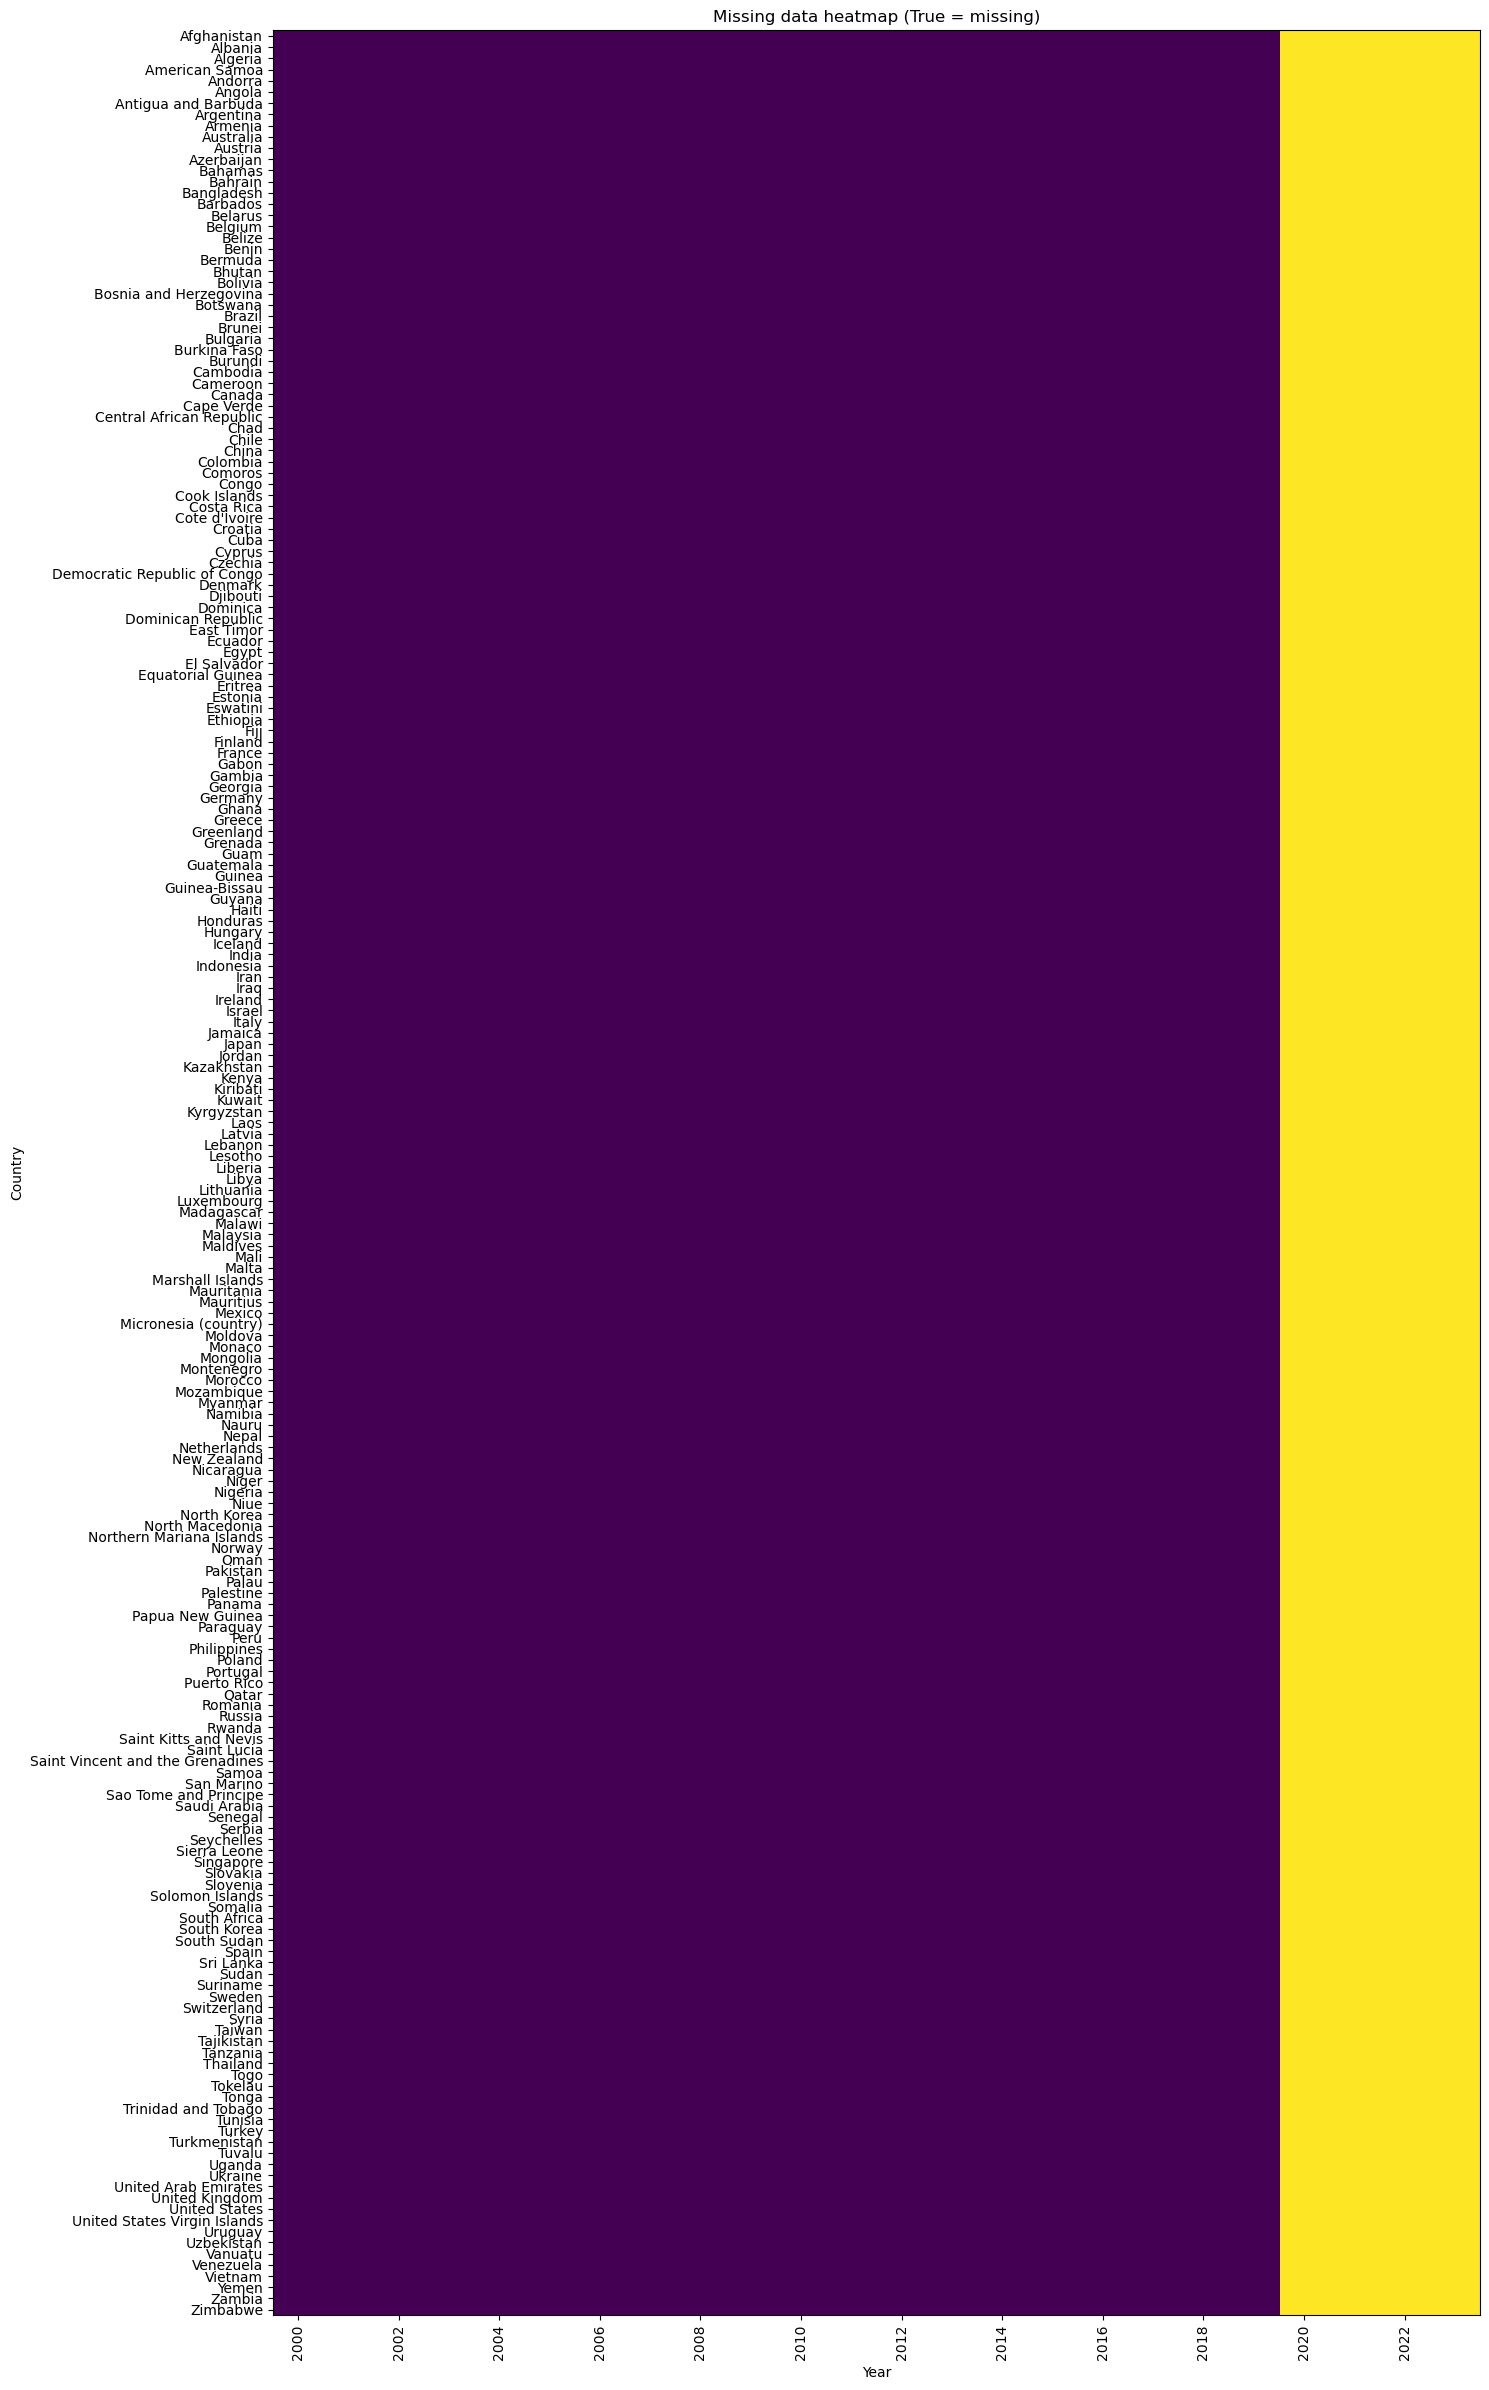

,years_with_data,years_missing,coverage_pct
Country,,,
Afghanistan,20,4,83.3
Albania,20,4,83.3
Algeria,20,4,83.3
American Samoa,20,4,83.3
Andorra,20,4,83.3
Angola,20,4,83.3
Antigua and Barbuda,20,4,83.3
Argentina,20,4,83.3
Armenia,20,4,83.3


In [31]:
fns.plot_missing_heatmap(missing_matrix, show_y_labels=True, x_step=2, figsize=(15,24))
summary

#### Aplicamos la misma funcion coverage_report para el resto de df y los guardamos en un diccionario

In [42]:
results_coverage = {}  # aquí guardamos todo por key

for key, df in df_dict_final_years.items():
    
    summary, missing_years, missing_matrix = fns.coverage_report(df, range_years)
    
    results_coverage[key] = {
        "summary": summary,
        "missing_years": missing_years,     
        "missing_matrix": missing_matrix    
    }

In [36]:
[k for k in df_dict_final_years.keys()]

['life_expectancy',
 'annual_deaths',
 'death_suicides',
 'gdp_per_capita',
 'global_vaccination_coverage',
 'death_homicide',
 'public_health_gdp_spending',
 'poverty']

In [45]:
results_coverage["life_expectancy"]["summary"]

,years_with_data,years_missing,coverage_pct
Country,,,
Afghanistan,22,2,91.7
Albania,22,2,91.7
Algeria,22,2,91.7
American Samoa,22,2,91.7
Andorra,22,2,91.7
Angola,22,2,91.7
Anguilla,22,2,91.7
Antigua and Barbuda,22,2,91.7
Argentina,22,2,91.7


#### Ahora quiero ver el %coverage por pais en el rango (2000-2023)

In [44]:
for key in results_coverage:
    print(f"\n=== Dataset: {key} (Top 10 missing) ===")
    summary = results_coverage[key]["summary"]
    top = summary.sort_values("years_missing", ascending=False).head(20)
    print(top[["years_missing", "coverage_pct"]])


=== Dataset: life_expectancy (Top 10 missing) ===
                          years_missing  coverage_pct
Country                                              
Afghanistan                           2          91.7
Palestine                             2          91.7
New Zealand                           2          91.7
Nicaragua                             2          91.7
Niger                                 2          91.7
Nigeria                               2          91.7
Niue                                  2          91.7
North Korea                           2          91.7
North Macedonia                       2          91.7
Northern Mariana Islands              2          91.7
Norway                                2          91.7
Oman                                  2          91.7
Pakistan                              2          91.7
Palau                                 2          91.7
Panama                                2          91.7
Saint Helena                   

Con mi referencia de paises de life expectancy, los datos llegan hasta 2021, por lo que primero filtraremos de 2000 - 2021, para hacer la seleccion de paises y luego hacer webscrapping de los datos faltantes

#### Funcion de coverage report x range_year

In [52]:
df_dict_final_countries = {}

print(f"\n=== Datasets filtered by countries ===")
for key, df in df_dict_inicial.items():
    df_filtered = df[df['Country'].isin(paises_reales)].reset_index(drop=True)
    df_dict_final_countries[key] = df_filtered
    print(f"{key}: Inicial: {df.shape}, filtered_countries: {df_filtered.shape}")

df_dict_final_years = {}

year_min = 2000
year_max = 2021

range_years = list(range(year_min, year_max + 1))

print(f"\n=== Datasets filtered by years ({year_min} to {year_max}) ===")
for key, df in df_dict_final_countries.items():
    df_dict_final_years[key] = df[df["Year"] >= year_min].copy()
    print(f"{key}: filtered_countries: {df.shape}, filtered_years: {df_dict_final_years[key].shape}")

results_coverage = {}  # aquí guardamos todo por key

print(f"\n=== Coverage Report for datasets ===\n")
for key, df in df_dict_final_years.items():
    
    summary, missing_years, missing_matrix = fns.coverage_report(df, range_years)
    
    results_coverage[key] = {
        "summary": summary,
        "missing_years": missing_years,     
        "missing_matrix": missing_matrix    
    }

top_n = 20

for key in results_coverage:
    print(f"\nDataset: {key} - Top {top_n} missing\n")
    summary = results_coverage[key]["summary"]
    top = summary.sort_values("years_missing", ascending=False).head(top_n)
    print(top[["years_missing", "coverage_pct"]])


=== Datasets filtered by countries ===
life_expectancy: Inicial: (20755, 5), filtered_countries: (19017, 5)
annual_deaths: Inicial: (6840, 35), filtered_countries: (6120, 35)
death_suicides: Inicial: (3880, 5), filtered_countries: (3660, 5)
gdp_per_capita: Inicial: (10108, 5), filtered_countries: (10108, 5)
global_vaccination_coverage: Inicial: (7897, 15), filtered_countries: (7603, 15)
death_homicide: Inicial: (4204, 5), filtered_countries: (3982, 5)
public_health_gdp_spending: Inicial: (4014, 5), filtered_countries: (3734, 5)
poverty: Inicial: (2602, 109), filtered_countries: (2107, 109)

=== Datasets filtered by years (2000 to 2021) ===
life_expectancy: filtered_countries: (19017, 5), filtered_years: (5170, 5)
annual_deaths: filtered_countries: (6120, 35), filtered_years: (4080, 35)
death_suicides: filtered_countries: (3660, 5), filtered_years: (3660, 5)
gdp_per_capita: filtered_countries: (10108, 5), filtered_years: (3592, 5)
global_vaccination_coverage: filtered_countries: (7603,

#### Ahora miremos que paises por dataset tienen un coverage% menor 70%, el restante, miraremos como completar los datos

In [54]:
high_coverage_by_dataset = {}
low_coverage_by_dataset = {}

pctg = 80

for key, res in results_coverage.items():
    summary = res["summary"]

    high = summary[summary["coverage_pct"] >= pctg].copy()
    low  = summary[summary["coverage_pct"] <  pctg].copy()

    high_coverage_by_dataset[key] = high
    low_coverage_by_dataset[key] = low

    print(f"\n=== {key} ===")
    print(f"Paises con coverage < {pctg}%: {len(low)}")
    display(low[["years_with_data", "years_missing", "coverage_pct"]])

    # print(f"Paises con coverage >= {pctg}%: {len(high)}")
    # display(high[["years_with_data", "years_missing", "coverage_pct"]])


=== life_expectancy ===
Paises con coverage < 80%: 0


,years_with_data,years_missing,coverage_pct
Country,,,



=== annual_deaths ===
Paises con coverage < 80%: 0


,years_with_data,years_missing,coverage_pct
Country,,,



=== death_suicides ===
Paises con coverage < 80%: 0


,years_with_data,years_missing,coverage_pct
Country,,,



=== gdp_per_capita ===
Paises con coverage < 80%: 9


,years_with_data,years_missing,coverage_pct
Country,,,
Antigua and Barbuda,17,5,77.3
Kyrgyzstan,17,5,77.3
Syria,17,5,77.3
Bermuda,15,7,68.2
Cayman Islands,15,7,68.2
Curacao,15,7,68.2
Venezuela,15,7,68.2
Sint Maarten (Dutch part),13,9,59.1
Uzbekistan,11,11,50.0



=== global_vaccination_coverage ===
Paises con coverage < 80%: 2


,years_with_data,years_missing,coverage_pct
Country,,,
Montenegro,16,6,72.7
South Sudan,11,11,50.0



=== death_homicide ===
Paises con coverage < 80%: 106


,years_with_data,years_missing,coverage_pct
Country,,,
Antigua and Barbuda,17,5,77.3
Azerbaijan,17,5,77.3
Bahrain,17,5,77.3
Cayman Islands,17,5,77.3
Greenland,17,5,77.3
Kenya,17,5,77.3
Poland,17,5,77.3
Saint Vincent and the Grenadines,17,5,77.3
Seychelles,17,5,77.3



=== public_health_gdp_spending ===
Paises con coverage < 80%: 8


,years_with_data,years_missing,coverage_pct
Country,,,
East Timor,17,5,77.3
Iraq,17,5,77.3
Yemen,16,6,72.7
Syria,13,9,59.1
Libya,12,10,54.5
Zimbabwe,10,12,45.5
Montenegro,9,13,40.9
South Sudan,3,19,13.6



=== poverty ===
Paises con coverage < 80%: 111


,years_with_data,years_missing,coverage_pct
Country,,,
Bulgaria,17,5,77.3
Cyprus,17,5,77.3
Netherlands,17,5,77.3
Croatia,16,6,72.7
Slovakia,16,6,72.7
Uruguay,16,6,72.7
Iceland,15,7,68.2
Malta,15,7,68.2
Switzerland,15,7,68.2


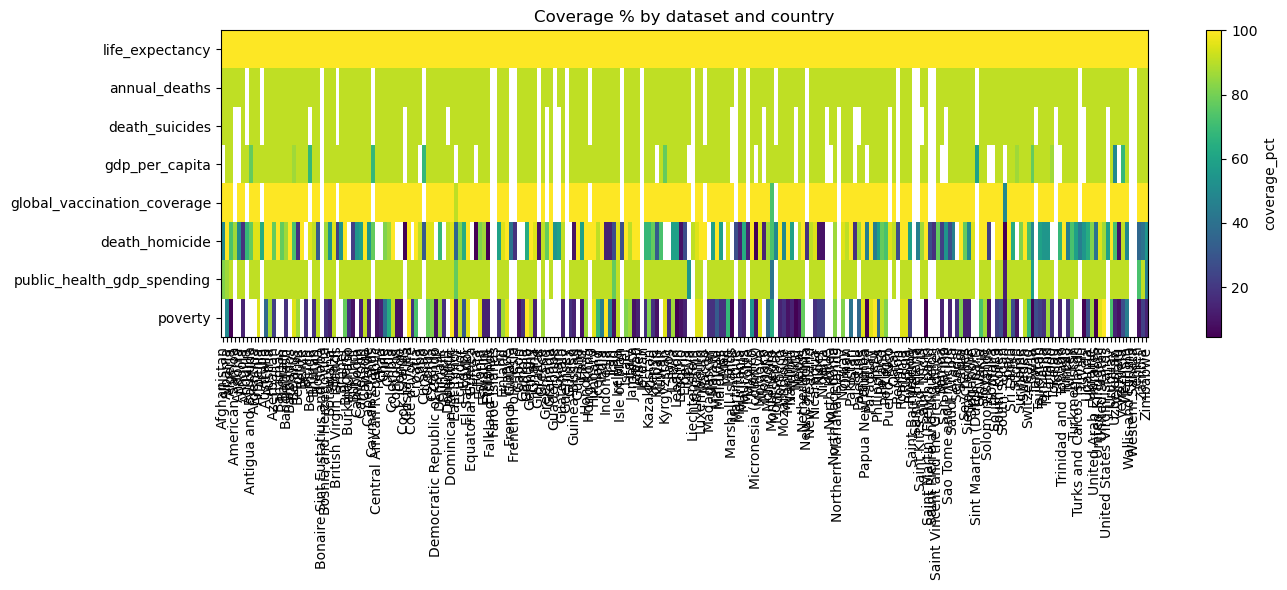

In [55]:
coverage_table = pd.concat(
    {name: res["summary"]["coverage_pct"] for name, res in results_coverage.items()},
    axis=1
).T  # datasets como filas

plt.figure(figsize=(14, 6))
plt.imshow(coverage_table.values, aspect="auto", interpolation="nearest")
plt.yticks(range(len(coverage_table.index)), coverage_table.index)
plt.xticks(range(len(coverage_table.columns)), coverage_table.columns, rotation=90)
plt.title("Coverage % by dataset and country")
plt.colorbar(label="coverage_pct")
plt.tight_layout()
plt.show()

### Para ver esto de una mejor manera, separaremos la lista de paises en continentes

Primero obtengo la lista de paises que tienen almenos 1 dato en los df en los years (2000 - 2021), haciendo una interseccion de los df

In [60]:
countries_by_dataset = {}

for ds, res in results_coverage.items():
    summary = res["summary"]
    present = summary.loc[summary["years_with_data"] > 0].index.tolist()
    countries_by_dataset[ds] = set(present)

all_countries_union = sorted(set().union(*countries_by_dataset.values()))

# intersection (paises en todos los datasets)
all_countries_intersection = sorted(set.intersection(*countries_by_dataset.values()))

# print("Union (>=1 dataset):", len(all_countries_union))
# print("Union (all datasets):", len(all_countries_union))
# print("Paises: ", all_countries_union)

print("Intersection (all datasets):", len(all_countries_intersection))
print("Paises: ", all_countries_intersection)

print(countries_by_dataset.keys())

Intersection (all datasets): 128
Paises:  ['Albania', 'Algeria', 'Angola', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burundi', 'Cameroon', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Maldives', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'Nicaragua'

Con la lista de paises, seleccionamos los paises por contiente para tener una mejor visualizacion de los datos

In [82]:
countries_by_continent_union = {
    "Africa": [
        "Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cameroon","Cape Verde",
        "Central African Republic","Chad","Comoros","Congo","Cote d'Ivoire","Djibouti",
        "Egypt","Equatorial Guinea","Eritrea","Eswatini","Ethiopia","Gabon","Gambia","Ghana",
        "Guinea","Guinea-Bissau","Kenya","Lesotho","Liberia","Libya","Madagascar","Malawi",
        "Mali","Mauritania","Mauritius","Mayotte","Mozambique","Namibia","Niger","Nigeria",
        "Reunion","Rwanda","Sao Tome and Principe","Senegal","Seychelles","Sierra Leone",
        "Somalia","South Africa","South Sudan","Sudan","Tanzania","Togo","Tunisia","Uganda",
        "Western Sahara","Zambia","Zimbabwe"
    ],
    "Asia": [
        "Afghanistan","Bahrain","Bangladesh","Bhutan","Brunei","Cambodia","China","Cyprus",
        "East Timor","Georgia","Hong Kong","India","Indonesia","Iran","Iraq","Israel","Japan",
        "Jordan","Kazakhstan","Kuwait","Kyrgyzstan","Laos","Lebanon","Malaysia","Maldives",
        "Mongolia","Myanmar","Nepal","North Korea","Oman","Pakistan","Palestine","Philippines",
        "Qatar","Saudi Arabia","Singapore","South Korea","Sri Lanka","Syria","Taiwan","Tajikistan",
        "Thailand","Turkey","Turkmenistan","United Arab Emirates","Uzbekistan","Venezuela","Vietnam",
        "Yemen"
    ],
    "Europe": [
        "Albania","Andorra","Armenia","Austria","Azerbaijan","Belarus","Belgium",
        "Bosnia and Herzegovina","Bulgaria","Croatia","Czechia","Denmark","Estonia","Finland",
        "France","Germany","Greece","Guernsey","Hungary","Iceland","Ireland","Italy","Jersey",
        "Latvia","Liechtenstein","Lithuania","Luxembourg","Malta","Moldova","Monaco",
        "Montenegro","Netherlands","North Macedonia","Norway","Poland","Portugal","Romania",
        "Russia","San Marino","Serbia","Slovakia","Slovenia","Spain","Sweden","Switzerland",
        "Turkey","Ukraine","United Kingdom"
    ],
    "North America": [
        "Antigua and Barbuda","Aruba","Bahamas","Barbados","Belize","Bermuda","British Virgin Islands",
        "Canada","Cayman Islands","Costa Rica","Cuba","Curacao","Dominica","Dominican Republic",
        "El Salvador","Greenland","Guadeloupe","Guam","Guatemala","Haiti","Honduras","Jamaica",
        "Martinique","Mexico","Montserrat","Niue","Northern Mariana Islands","Panama","Puerto Rico",
        "Saint Barthelemy","Saint Helena","Saint Kitts and Nevis","Saint Lucia","Saint Martin (French part)",
        "Saint Pierre and Miquelon","Saint Vincent and the Grenadines","Trinidad and Tobago",
        "Turks and Caicos Islands","United States","United States Virgin Islands"
    ],
    "South America": [
        "Argentina","Aruba","Bolivia","Brazil","Chile","Colombia","Ecuador","Guyana","Paraguay",
        "Peru","Suriname","Uruguay","Venezuela"
    ],
    "Oceania": [
        "American Samoa","Cook Islands","Fiji","Kiribati","Marshall Islands","Micronesia (country)",
        "Nauru","New Caledonia","New Zealand","Niue","Palau","Papua New Guinea","Samoa",
        "Solomon Islands","Tokelau","Tonga","Tuvalu","Vanuatu","Wallis and Futuna"
    ]
}


In [76]:
countries_by_continent_intersection = {
    "Africa": [
        "Algeria","Angola","Botswana","Burundi","Cameroon","Cape Verde","Egypt","Eswatini",
        "Ethiopia","Ghana","Guinea-Bissau","Kenya","Lesotho","Liberia","Malawi","Mauritania",
        "Mauritius","Morocco","Mozambique","Namibia","Niger","Nigeria","Rwanda",
        "Sao Tome and Principe","Seychelles","Sierra Leone","South Africa","Tanzania",
        "Tunisia","Uganda","Zambia","Zimbabwe"
    ],
    "Asia": [
        "Armenia","Azerbaijan","Bangladesh","Bhutan","China","Cyprus","Georgia","India",
        "Indonesia","Iran","Iraq","Israel","Japan","Jordan","Kazakhstan","Lebanon","Malaysia",
        "Maldives","Mongolia","Myanmar","Nepal","Pakistan","Philippines","South Korea",
        "Sri Lanka","Syria","Tajikistan","Thailand","Turkey","United Arab Emirates",
        "Uzbekistan","Vietnam","Yemen"
    ],
    "Europe": [
        "Albania","Austria","Belarus","Belgium","Bosnia and Herzegovina","Bulgaria","Croatia",
        "Czechia","Denmark","Estonia","Finland","France","Germany","Greece","Hungary","Iceland",
        "Ireland","Italy","Latvia","Lithuania","Luxembourg","Malta","Moldova","Montenegro",
        "Netherlands","North Macedonia","Norway","Poland","Portugal","Romania","Russia","Serbia",
        "Slovakia","Slovenia","Spain","Sweden","Switzerland","Ukraine","United Kingdom"
    ],
    "North America": [
        "Belize","Canada","Costa Rica","Dominican Republic","El Salvador","Guatemala","Haiti",
        "Honduras","Jamaica","Mexico","Nicaragua","Panama","Saint Lucia","United States"
    ],
    "South America": [
        "Bolivia","Brazil","Chile","Colombia","Ecuador","Paraguay","Peru","Uruguay","Venezuela"
    ],
    "Oceania": [
        "Australia","Fiji"
    ],
}


In [59]:
[k for k in results_coverage.keys()]

['life_expectancy',
 'annual_deaths',
 'death_suicides',
 'gdp_per_capita',
 'global_vaccination_coverage',
 'death_homicide',
 'public_health_gdp_spending',
 'poverty']

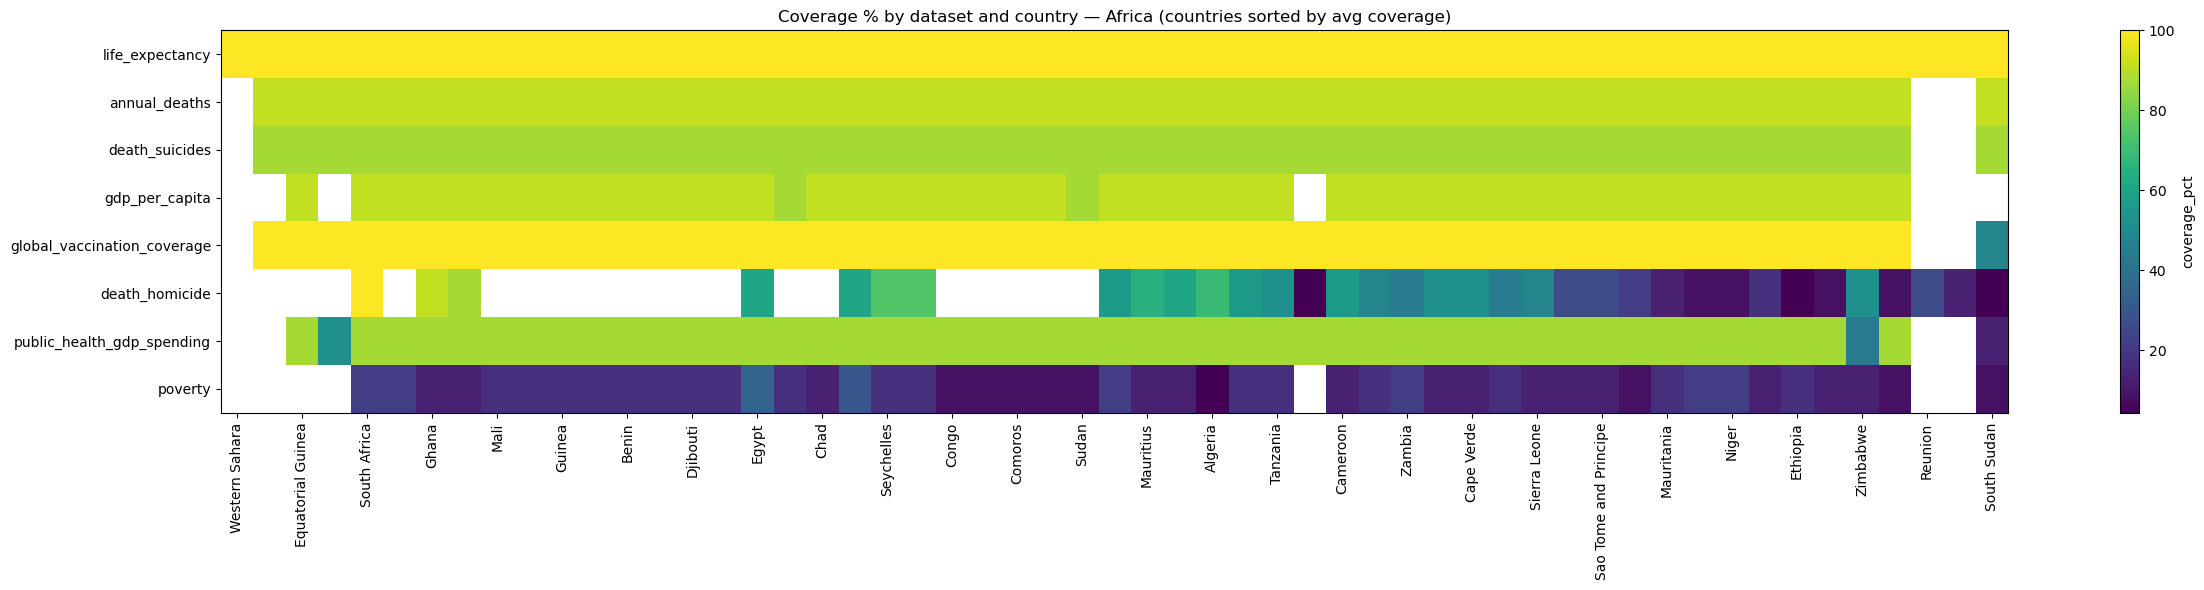

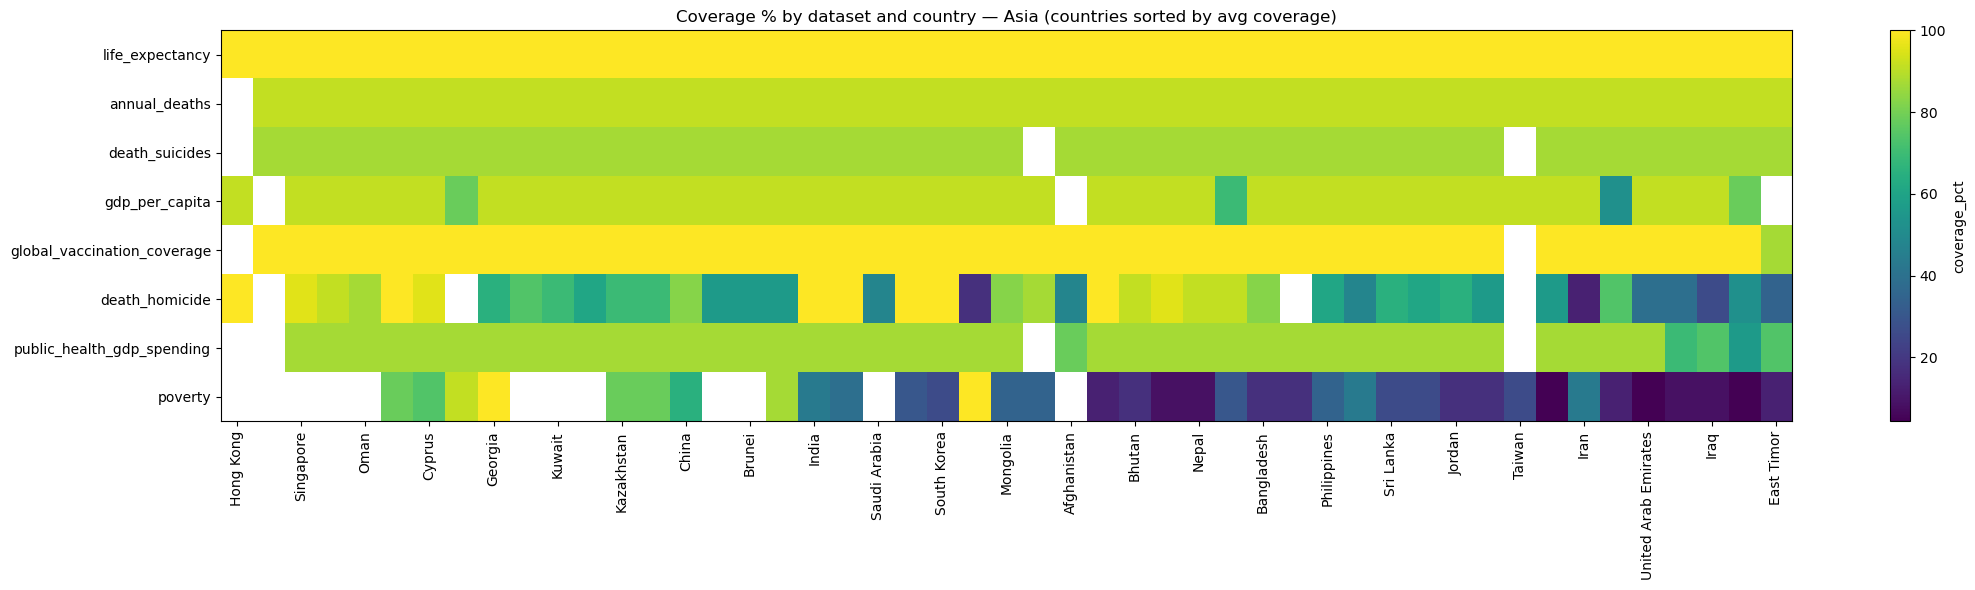

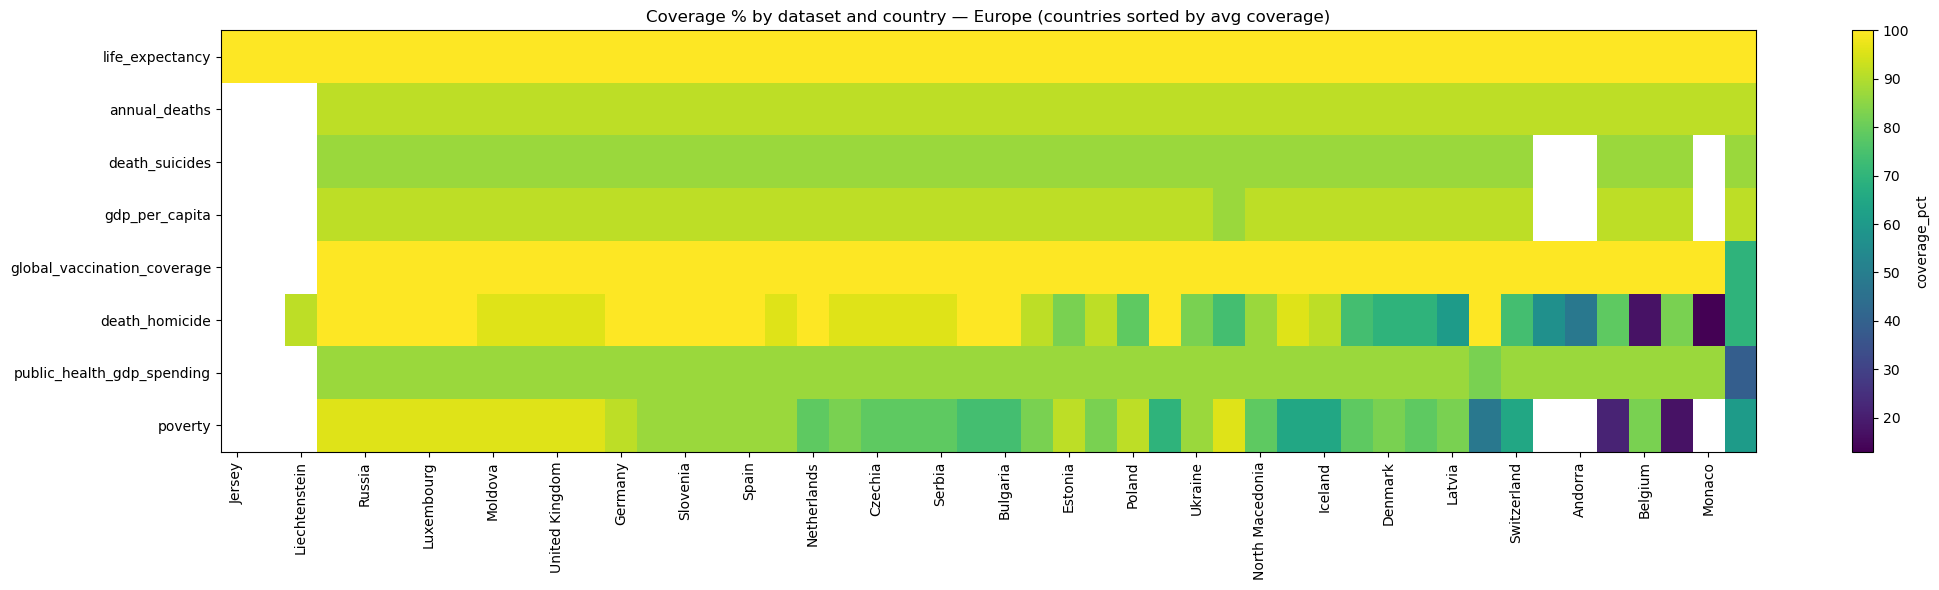

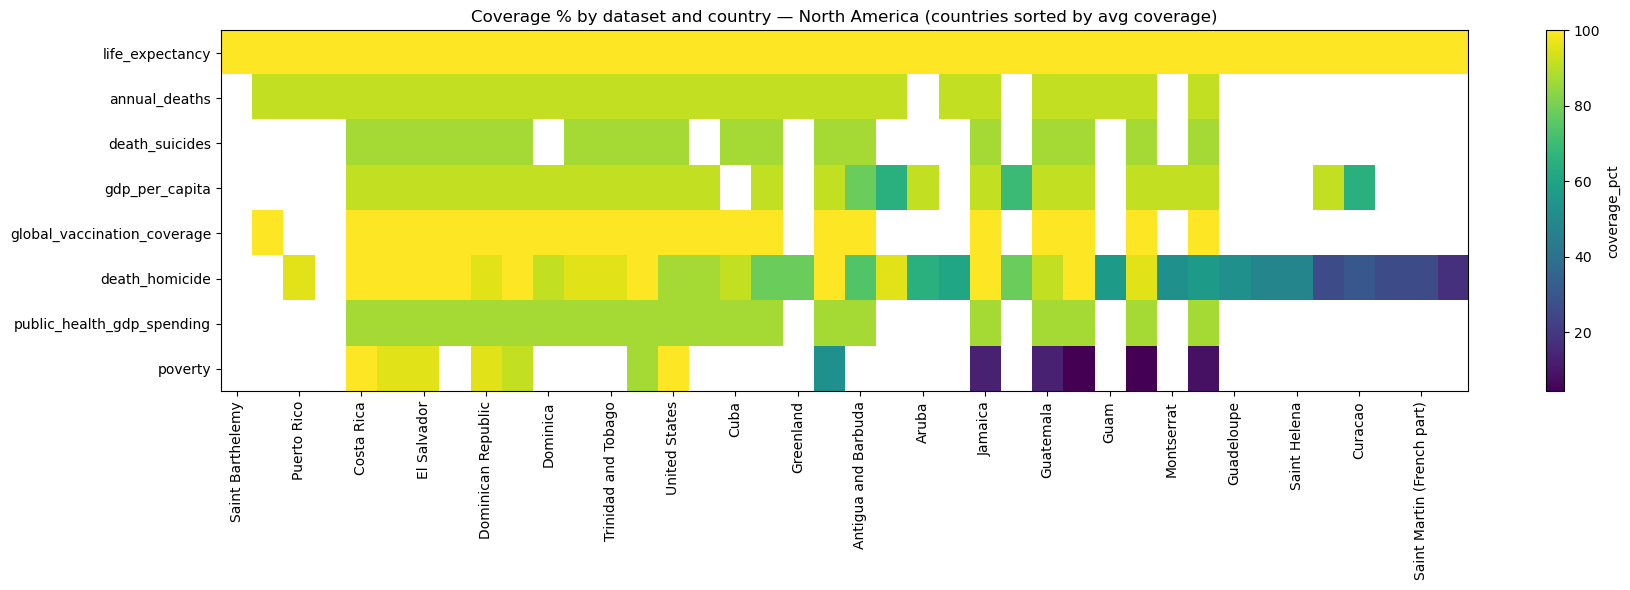

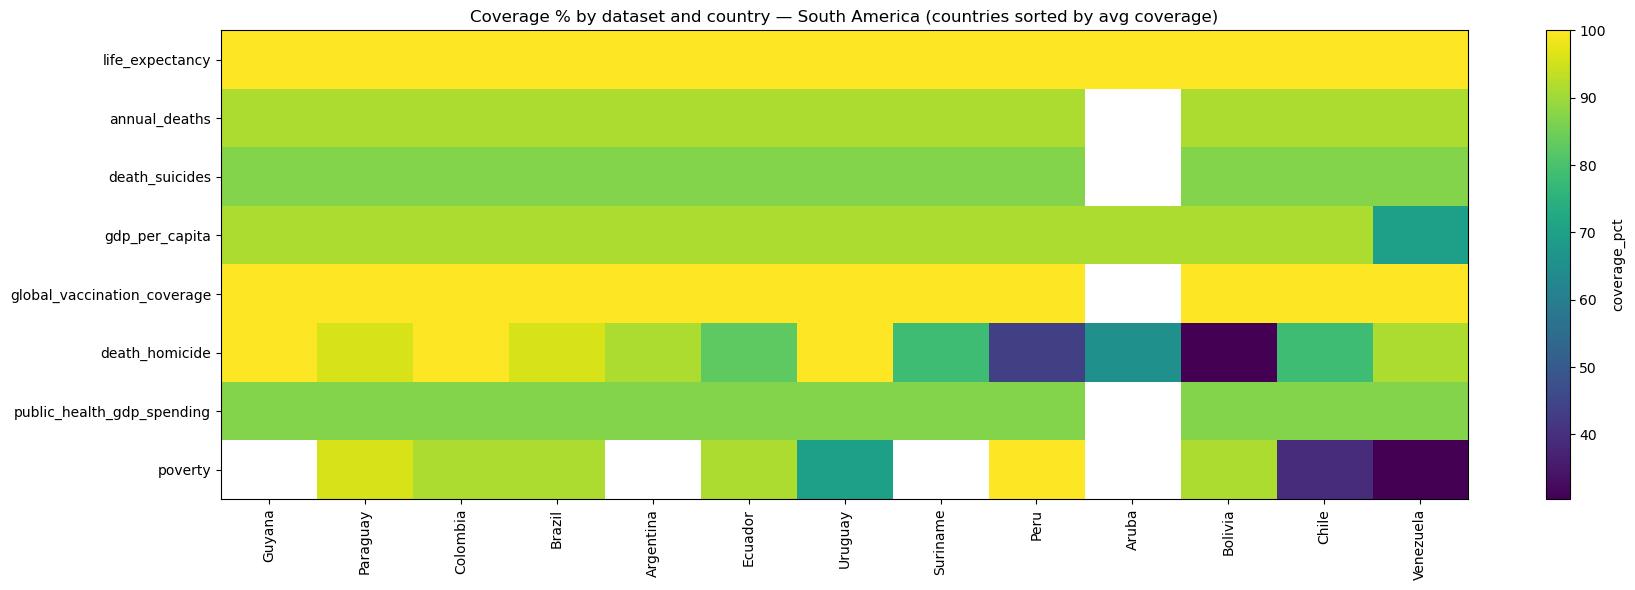

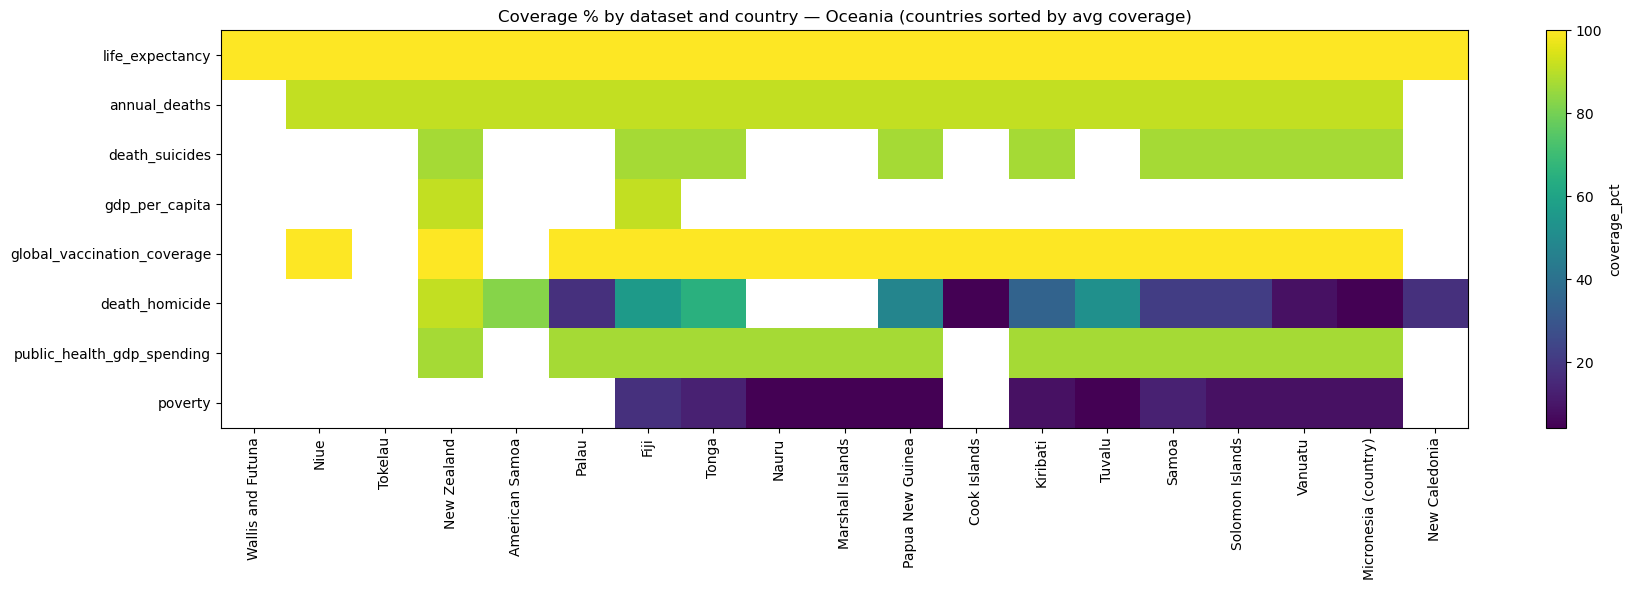

In [83]:
# coverage_table: filas=datasets, columnas=países
coverage_table = pd.concat(
    {name: res["summary"]["coverage_pct"] for name, res in results_coverage.items()},
    axis=1
).T

def plot_coverage_heatmap_by_continent_sorted(
    coverage_table: pd.DataFrame,
    countries_list: list,
    title: str,
    figsize=(18, 6),
    x_step=1
):
    # Quedarse con países que existan en la tabla
    cols = [c for c in countries_list if c in coverage_table.columns]
    ct = coverage_table[cols].copy()

    # Ordenar por promedio de coverage (entre datasets), de mayor a menor
    avg_cov = ct.mean(axis=0)  # promedio por país (a lo largo de filas/datasets)
    ordered_cols = avg_cov.sort_values(ascending=False).index.tolist()
    ct = ct[ordered_cols]

    plt.figure(figsize=figsize)
    plt.imshow(ct.values, aspect="auto", interpolation="nearest")
    plt.yticks(range(len(ct.index)), ct.index)

    xticks = list(range(0, len(ct.columns), x_step))
    plt.xticks(xticks, ct.columns[::x_step], rotation=90)

    plt.title(title + " (countries sorted by avg coverage)")
    plt.colorbar(label="coverage_pct")
    plt.tight_layout()
    plt.show()

# Un heatmap por continente (ordenado)
for cont, countries in countries_by_continent_union.items():
    # Ajustes automáticos para que se vea bien
    width = max(18, len(countries) * 0.45)  # más países => más ancho
    step = 1 if len(countries) <= 20 else 2  # si hay muchos países, reduce etiquetas
    plot_coverage_heatmap_by_continent_sorted(
        coverage_table,
        countries,
        title=f"Coverage % by dataset and country — {cont}",
        figsize=(width, 6),
        x_step=step
    )


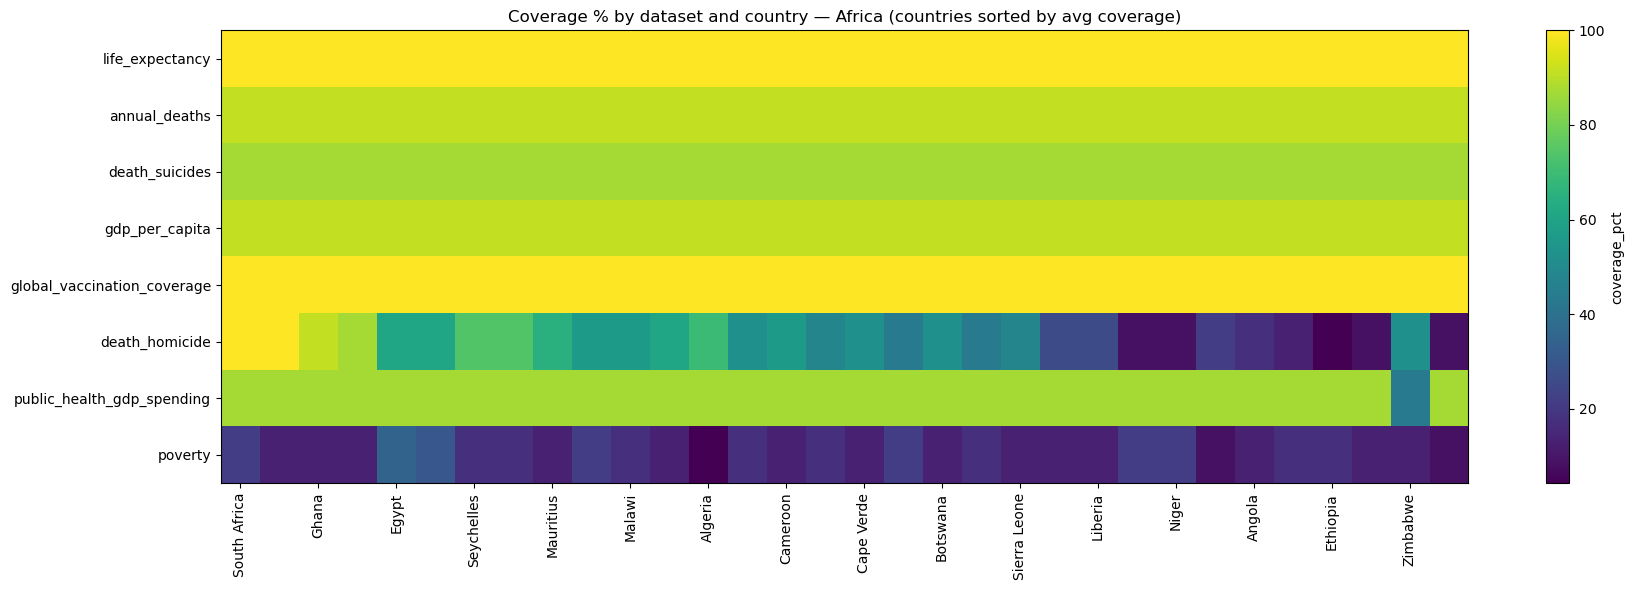

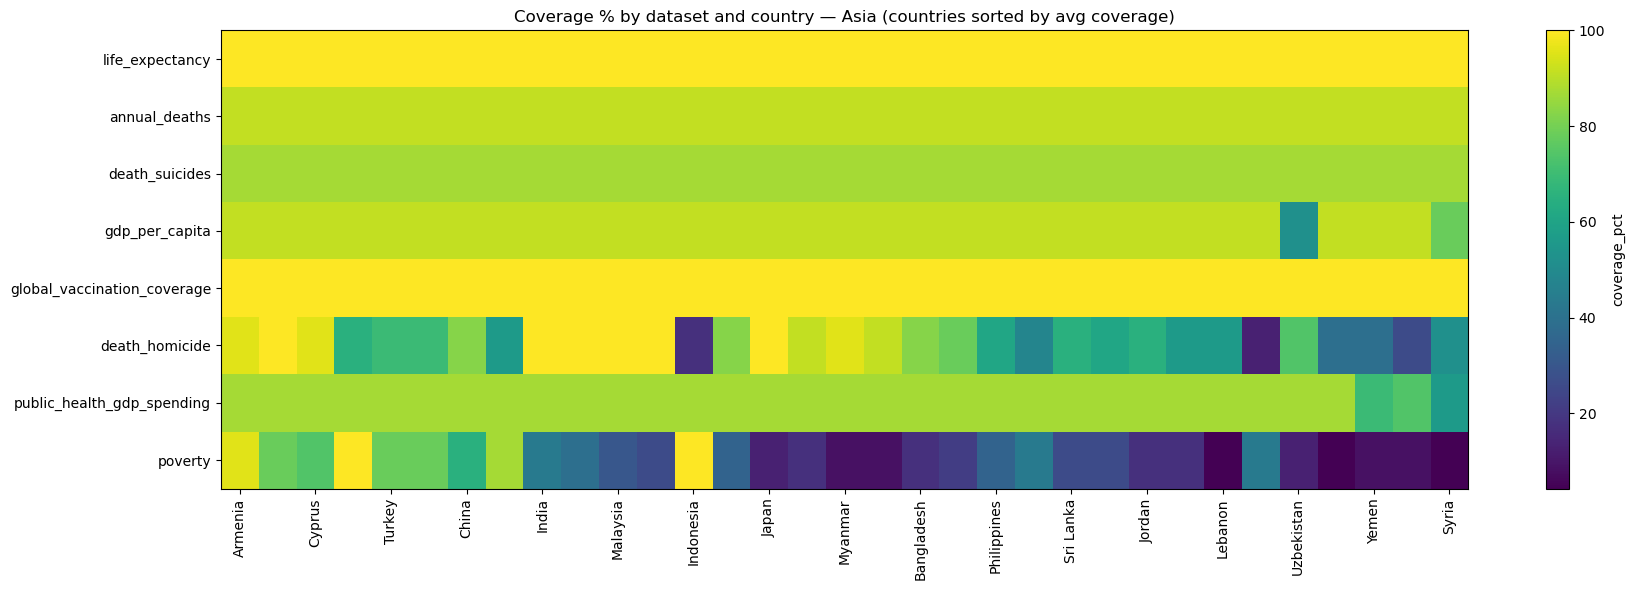

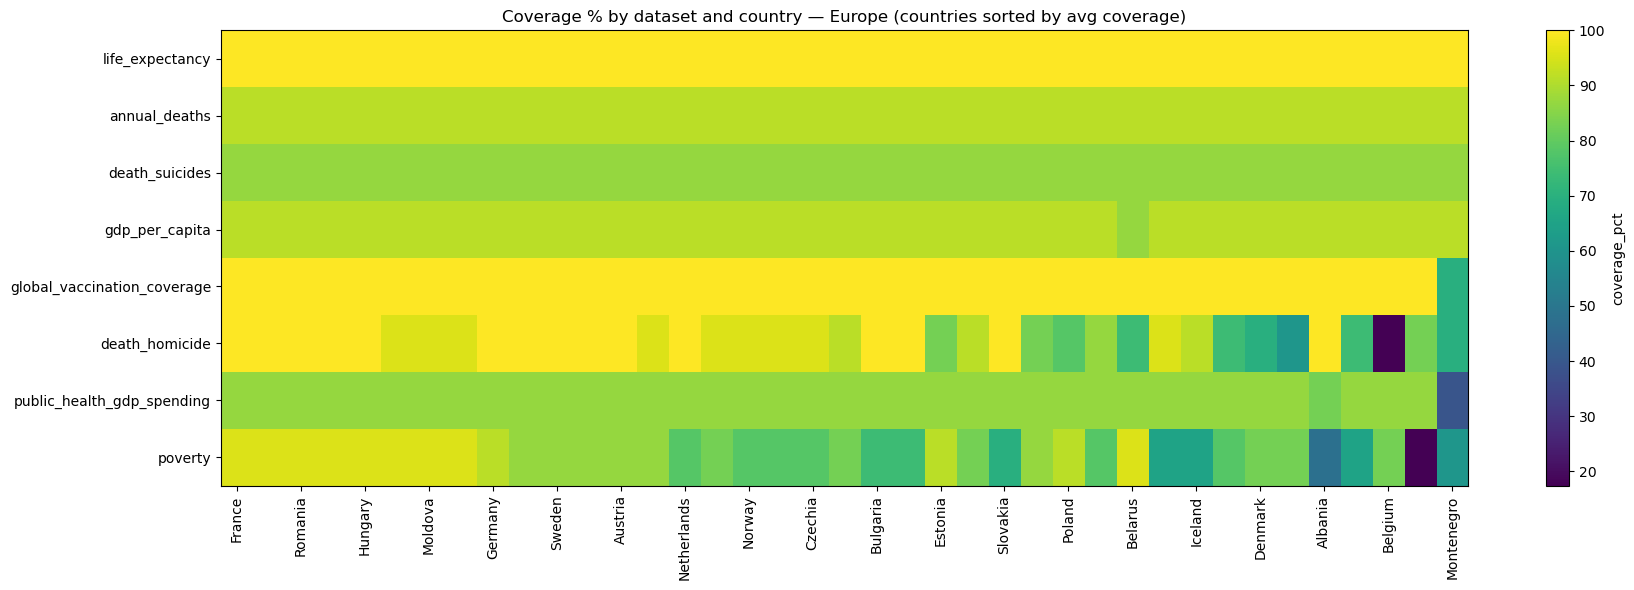

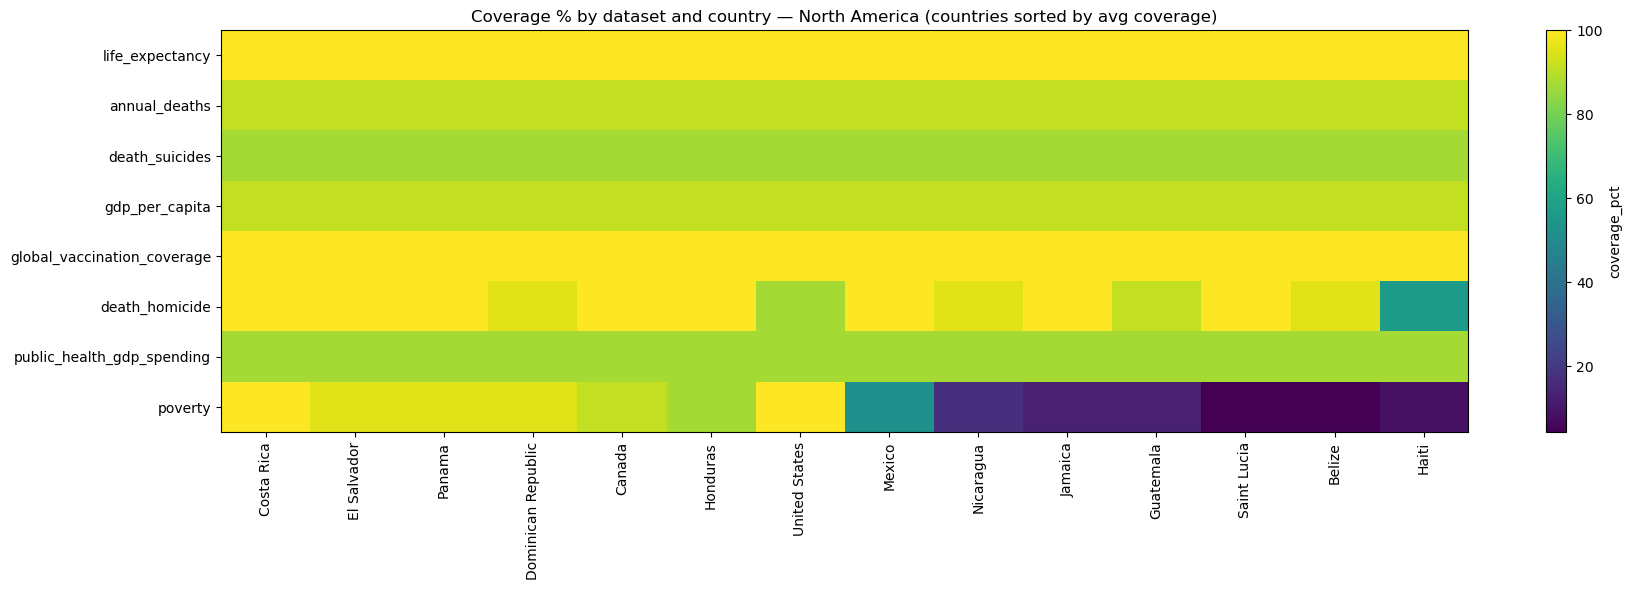

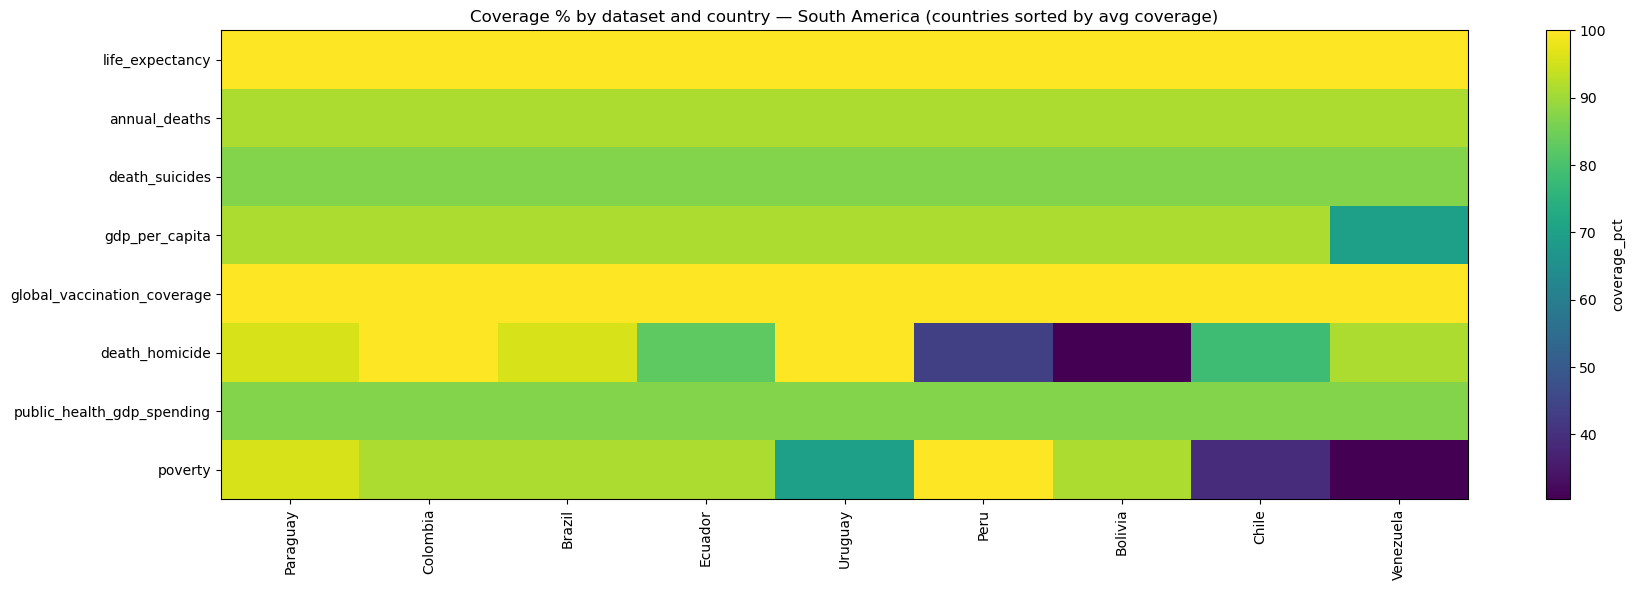

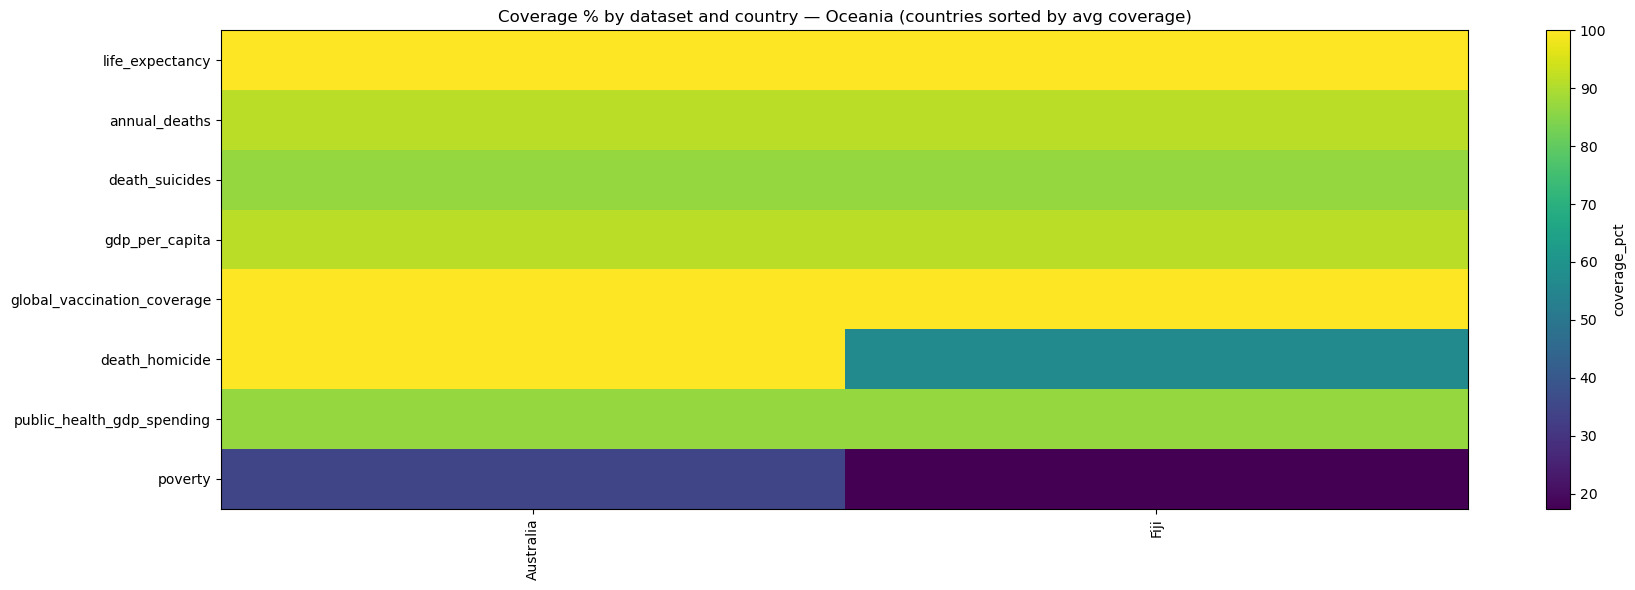

In [84]:
# Un heatmap por continente (ordenado)
for cont, countries in countries_by_continent_intersection.items():
    # Ajustes automáticos para que se vea bien
    width = max(18, len(countries) * 0.45)  # más países => más ancho
    step = 1 if len(countries) <= 20 else 2  # si hay muchos países, reduce etiquetas
    plot_coverage_heatmap_by_continent_sorted(
        coverage_table,
        countries,
        title=f"Coverage % by dataset and country — {cont}",
        figsize=(width, 6),
        x_step=step
    )

In [61]:
dfs_union = {
    name: df[df["Country"].isin(all_countries_union) & df["Year"].isin(range_years)]
    for name, df in df_dict_final_years.items()
}

dfs_union.keys()

dict_keys(['life_expectancy', 'annual_deaths', 'death_suicides', 'gdp_per_capita', 'global_vaccination_coverage', 'death_homicide', 'public_health_gdp_spending', 'poverty'])

In [ ]:
for key, value in dfs_union.items():
    print(key)
    fns.exploracion_inicial(value, 'simple')

Primer Analisis de datasets de union e interseccion:

En todos los continentes se repite un patrón, los indicadores de salud (life_expectancy, annual_deaths, global_vaccination_coverage) tienden a tener alta cobertura y continuidad, mientras que los indicadores socioeconómicos (especialmente poverty) y algunos de violencia/seguridad (death_homicide) muestran mediciones episódicas y fuertes diferencias entre países. 

La UNIÓN maximiza representatividad pero expone grandes vacíos; la INTERSECCIÓN aumenta consistencia para análisis multivariado, pero reduce países y puede sesgar el análisis hacia contextos con mejor infraestructura estadística.

Africa:

Union: 

- Alta cobertura en life expectancy

Los heatmaps basados en la unión de países muestran una distribución de datos altamente heterogénea entre continentes y dentro de cada región. Se observan países con cobertura casi completa (filas predominantemente “con dato”) junto a otros con grandes bloques de años faltantes o con presencia esporádica, lo que sugiere diferencias en capacidad estadística, periodicidad de medición y disponibilidad histórica de ciertos indicadores. Esta variabilidad es especialmente marcada en variables socioeconómicas como pobreza, donde aparecen patrones típicos de encuestas (años aislados con medición y vacíos intermedios), y en algunos casos hay países con ausencia casi total (filas mayormente en blanco). En conjunto, la unión captura el panorama global real de disponibilidad de información, pero evidencia un sesgo de “reporting” por región: algunas regiones concentran más discontinuidad, lo que limita comparaciones directas año a año si no se aplican controles.

Al pasar a la intersección (países con presencia en todos los datasets), los heatmaps muestran una matriz más densa y consistente: disminuyen los países completamente vacíos y se reducen los huecos extremos, lo que facilita análisis multivariables y comparaciones más justas en el tiempo. Sin embargo, esta mejora viene con un costo metodológico: la intersección tiende a retener países con mejor continuidad de reporte, lo que puede sesgar el conjunto hacia regiones con mayor infraestructura de datos y dejar subrepresentados países de bajos ingresos. Por ello, los heatmaps apoyan una estrategia en dos niveles: usar la unión para análisis exploratorio y diagnóstico de brechas, y usar la intersección (idealmente con un umbral adicional de cobertura, por ejemplo ≥70–80%) para el modelado predictivo y el simulador, minimizando imputación y aumentando la robustez de los resultados.

#### Para proponer la lista de paises, se escogen pasises por continente entre avanzado, en desarollo o subdesarrollado e propone una lista de paises a seleccionar por contiente para su analisis segun los paises en life_expectancy

África (10)
 -   South Africa (medio-alto / emergente)
 -   Egypt (en desarrollo)
 -   Algeria (en desarrollo)
 -   Ghana (en desarrollo)
 -   Kenya (en desarrollo)
 -   Ethiopia (más pobre)
 -   Nigeria (en desarrollo / grande)
 -   Senegal (en desarrollo)
 -   Rwanda (más pobre / buen caso de mejora)
 -   Somalia (más pobre / frágil)

Asia (10)
 -   Japan (avanzado)
 -   South Korea (avanzado)
 -   Singapore (avanzado)
 -   China (en desarrollo / grande)
 -   India (en desarrollo / grande)
 -   Indonesia (en desarrollo)
 -   Vietnam (en desarrollo)
 -   Iran (en desarrollo)
 -   Bangladesh (más pobre)
 -   Afghanistan (más pobre / frágil)

Europa (10)
 -   Switzerland (avanzado)
 -   Germany (avanzado)
 -   France (avanzado)
 -   Spain (avanzado)
 -   Italy (avanzado)
 -   Poland (en desarrollo/medio-alto UE)
 -   Romania (en desarrollo/medio-alto UE)
 -   Ukraine (en desarrollo / choque reciente)
 -   Serbia (en desarrollo/medio-alto)
 -   Albania (en desarrollo)

Norteamérica (10) (incluye Centroamérica y Caribe, pero solo países)
 -  United States (avanzado)
 -  Canada (avanzado)
 -  Mexico (en desarrollo)
 -  Guatemala (en desarrollo)
 -  Honduras (más pobre)
 -  Haiti (más pobre)
 -  Cuba (en desarrollo)
 -  Dominican Republic (en desarrollo)
 -  Jamaica (en desarrollo)
 -  Bahamas (alto ingreso / caribe)

Sudamérica (10)
 - Chile (más avanzado en la región)
 - Argentina (en desarrollo/medio-alto)
 - Uruguay (medio-alto)
 - Brazil (en desarrollo / grande)
 - Colombia (en desarrollo)
 - Peru (en desarrollo)
 - Ecuador (en desarrollo)
 - Paraguay (en desarrollo)
 - Bolivia (más pobre)
 - Venezuela (en desarrollo / crisis)

Oceanía (10)
 - Australia (avanzado)
 - New Zealand (avanzado)
 - Papua New Guinea (más pobre)
 - Fiji (en desarrollo)
 - Solomon Islands (más pobre)
 - Vanuatu (en desarrollo)
 - Samoa (en desarrollo)
 - Tonga (en desarrollo)
 - Kiribati (más pobre)
 - Tuvalu (más pobre)